# Quantify behavioral data from fMRI C-PRO experiment

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import analyzeBehavior as analyze
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Arial"

##### Load and sort data

In [2]:
datadir = '../../../data/fMRI_BehavData/'

subjNums = ['013','014','016','017','018','021','023','024','026','027','028','030','031','032','033',
            '034','035','037','038','039','040','041','042','043','045','046','047','048','049','050',
            '053','055','056','057','058','062','063','066','067','068','069','070','072','074','075',
            '076','077','081','085','086','087','088','090','092','093','094','095','097','098','099',
            '101','102','103','104','105','106','108','109','110','111','112','114','115','117','119',
            '120','121','122','123','124','125','126','127','128','129','130','131','132','134','135',
            '136','137','138','139','140','141']
# # ### Doesn't need to be run again

# keyValues = {'Logic':'LogicCue[LogLevel5]', 'Sensory':'SemanticCue[LogLevel5]', 'Motor':'ResponseCue[LogLevel5]','Accuracy':'Feedback[LogLevel6]', 'Novelty':'TaskType_rec', 'TaskNum':'TaskName[LogLevel5]',
#              'PracTaskIntro':'PracIntroExampleList',
#              'LogicExample':'LogicCue[SubTrial]','SensoryExample':'SemanticCue[SubTrial]','MotorExample':'ResponseCue[SubTrial]',
#              'PracIntroAccuracy':'Feedback[LogLevel5]','RT':'ProbeStim1.RT'}
# # Simplify dataframe into easier key-value strings
# for subj in subjNums:
#     df = pd.read_csv(datadir + subj + '_behavdata.csv')
#     df_new = {}
#     for key in keyValues:
#         df_new[key] = df[keyValues[key]].values
        
#     df = pd.DataFrame(df_new)
#     df.to_csv(datadir + subj + '_behavdata_reformatted.csv')
        

# Plot performances across different conditions
* Novel and practiced conditions
* 1st presentation of practiced tasks, 2nd presentation of practiced tasks
* 1st presentation of novel tasks, 2nd presentation of novel tasks

# Practiced v 2-rule v 1-rule on first presentation of tasks only

Practice accuracy: 87.6736111111111
2-rule similarity accuracy: 84.85725308641975
1-rule similarity accuracy: 83.47800925925925
Practiced versus 2-rule: stat = 1598.0 | p = 0.007629746111402928
2-rule versus 1-rule: stat = 1669.0 | p = 0.03356337180402668


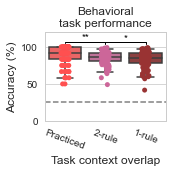

In [3]:
analyze=reload(analyze)
palette_color = ['#ff5050', '#cc6699','#993333']

df_acc = analyze.behaviorOfTaskSimilarity(subjNums,firstOnly=True)
df_acc.rename(columns = {'2-rule similarity':'2-rule overlap'}, inplace = True)
df_acc.rename(columns = {'1-rule similarity':'1-rule overlap'}, inplace = True)
df_acc.Accuracy = df_acc.Accuracy.values * 100.0
prac_acc = df_acc.loc[df_acc['Condition']=='Practiced']
rule2_acc = df_acc.loc[df_acc['Condition']=='2-rule similarity']
rule1_acc = df_acc.loc[df_acc['Condition']=='1-rule similarity']
print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
print('2-rule similarity accuracy:', np.mean(rule2_acc.Accuracy.values))
print('1-rule similarity accuracy:', np.mean(rule1_acc.Accuracy.values))
t, p = stats.wilcoxon(prac_acc.Accuracy.values,rule2_acc.Accuracy.values)
print('Practiced versus 2-rule: stat =', t, '| p =', p)
t, p = stats.wilcoxon(rule2_acc.Accuracy.values,rule1_acc.Accuracy.values)
print('2-rule versus 1-rule: stat =', t, '| p =', p)


plt.figure(figsize=(2.5,2.5))
tmp_df = pd.concat([prac_acc,rule2_acc,rule1_acc])
plt.title('Behavioral\ntask performance',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette=palette_color)
ax = sns.stripplot(x="Condition",y="Accuracy",data=tmp_df,
              dodge=True,palette=palette_color)
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
#
#### Statistical tests - Prac v 2-rule
t, p = stats.wilcoxon(tmp_df.Accuracy[tmp_df.Condition=='Practiced'].values,
                       tmp_df.Accuracy[tmp_df.Condition=='2-rule similarity'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = tmp_df.Accuracy[tmp_df.Condition=='Practiced'].max() + 5, 2, 'k'
plt.plot([x_prac, x_prac, x_2rule, x_2rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_prac+x_2rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
#### Statistical tests - 2-rule v Prac
t, p = stats.wilcoxon(tmp_df.Accuracy[tmp_df.Condition=='2-rule similarity'].values,
                       tmp_df.Accuracy[tmp_df.Condition=='1-rule similarity'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = tmp_df.Accuracy[tmp_df.Condition=='2-rule similarity'].values.max() + 5, 2, 'k'
plt.plot([x_2rule, x_2rule, x_1rule, x_1rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_2rule+x_1rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
plt.xticks(np.arange(0,3),['Practiced','2-rule','1-rule'],rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim([0,120])
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('Task context overlap', fontsize=12)
plt.tight_layout()
# plt.savefig('BehavioralEvidenceForCompositionality.png',dpi=300)